## A) Create MySQL DataBase

In [1]:
import mysql.connector as mysql

user, pw, host = 'root', '83219449dD$$', '127.0.0.1'

mydb = mysql.connect(user=user, password = pw, host=host)

mycursor = mydb.cursor()

try:
    print("Execute MySQL to create DataBase!")
    mycursor.execute("CREATE DATABASE moh_government_expenditure")
    mydb.commit()
    print("DATABASE CREATED!")
except:
    print("Unexpected Error!")
    exit()
finally:
    mycursor.close()
    mydb.close()

Execute MySQL to create DataBase!
DATABASE CREATED!


## B) Create Table in MySQL DataBase

In [2]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_government_expenditure'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

create_table = ("CREATE TABLE government_expenditure(financial_year INT(20) NOT NULL, operating_expenditure FLOAT(20) NOT NULL, development_expenditure FLOAT(20) NOT NULL, government_health_expenditure FLOAT(20) NOT NULL, percentage_gdp INT(20) NOT NULL, percentage_tge INT(20) NOT NULL)")
try:
    print("Execute MySQL to create table!")
    cursor.execute(create_table)
    mycursor.commit()
    print("Table Created!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to create table!
Table Created!


## C) Insert Data into MySQL DataBase

In [3]:
import mysql.connector as mysql
import pandas as pd

filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\Government-health-expenditure.csv'

df = pd.read_csv(filename)

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_government_expenditure'
mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

for index, col in df.iterrows():
    data = {'financial_year': col[0],
           'operating_expenditure': col[1],
           'development_expenditure':col[2],
           'government_health_expenditure': col[3],
           'percentage_gdp': col[4],
           'percentage_tge': col[5]}

    sql = ("INSERT INTO government_expenditure(financial_year, operating_expenditure, development_expenditure, government_health_expenditure, percentage_gdp, percentage_tge)"
          "VALUES(%(financial_year)s, %(operating_expenditure)s, %(development_expenditure)s, %(government_health_expenditure)s, %(percentage_gdp)s, %(percentage_tge)s)")

    cursor.execute(sql, data)
    print("Adding row" + str(index))
    mycursor.commit()

print("All data are inserted into DataBase!")

cursor.close()
mycursor.close()

Adding row0
Adding row1
Adding row2
Adding row3
Adding row4
Adding row5
Adding row6
Adding row7
Adding row8
Adding row9
All data are inserted into DataBase!


## D) Retrieve Data from MySQL DataBase

***** Welcome to the MOH Government Expenditure DataBase *****
1) Operating Expenditure
2) Development Expenditure
3) Health Expenditure
-------------------------------------------------------------------
Please select your choice to view the database: 3

Data Info for : government_health_expenditure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
financial_year                   10 non-null int64
government_health_expenditure    10 non-null float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes
None


Data for: government_health_expenditure
-------------------------------------------------------------
   financial_year  government_health_expenditure
0            2006                         2009.7
1            2007                         2283.2
2            2008                         2814.1
3            2009                         3746.0
4            2010                         3857.0
5            2011                  

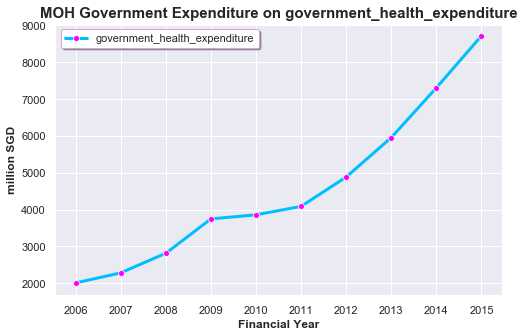

Would you like to see the relationship between Singapore Population and Government Health Expenditure? (Y/N):y
  Country Name  financial_year  SG population (in million)  \
0    Singapore            2006                   4401365.0   
1    Singapore            2007                   4588599.0   
2    Singapore            2008                   4839396.0   
3    Singapore            2009                   4987573.0   
4    Singapore            2010                   5076732.0   
5    Singapore            2011                   5183688.0   
6    Singapore            2012                   5312437.0   
7    Singapore            2013                   5399162.0   
8    Singapore            2014                   5469724.0   
9    Singapore            2015                   5535002.0   

   government_health_expenditure  
0                         2009.7  
1                         2283.2  
2                         2814.1  
3                         3746.0  
4                         3857.

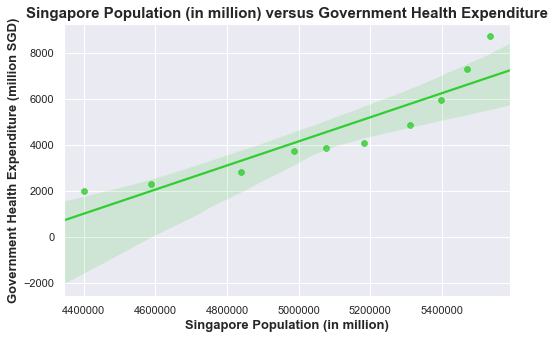

Correlation Coefficient:
                               financial_year  SG population (in million)  \
financial_year                       1.000000                    0.979986   
SG population (in million)           0.979986                    1.000000   
government_health_expenditure        0.964501                    0.909170   

                               government_health_expenditure  
financial_year                                      0.964501  
SG population (in million)                          0.909170  
government_health_expenditure                       1.000000  



In [7]:
import mysql.connector as mysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################################################## Define Functions ######################################################
def data_info(expenditure, expenditure_df1):
    print()
    print("Data Info for : " + expenditure)
    print(expenditure_df1.info())
    print()

def table_of_data(expenditure, expenditure_df1):
    print()
    print("Data for: " + expenditure)
    print("-------------------------------------------------------------")
    print(expenditure_df1)
    print()

def descriptive_stats_summary(expenditure, expenditure_df1):
    print("Basic Descriptive Statistics Summary for {}:".format(expenditure))
    print("-------------------------------------------------------------")
    print(expenditure_df1[expenditure].describe())
    print()

def line_graph(expenditure, expenditure_df1):
    print("Graphical Summary for {}:".format(expenditure))
    print("--------------------------------------------------------------")
    sns.set(style = "darkgrid", rc = {'figure.figsize' : (8,5)})
    ax = sns.lineplot(x = "financial_year", y = expenditure, data = expenditure_df1, marker = "o", color = "deepskyblue",
                      linewidth = 3, markerfacecolor = "fuchsia", label = "{}".format(expenditure) )
    ax.set_title("MOH Government Expenditure on " + expenditure, fontsize = 15, fontweight = "bold" )
    ax.set_xlabel("Financial Year", fontsize = 12, fontweight = "bold")
    ax.set_ylabel("million SGD", fontsize = 12, fontweight = "bold")
    ax.set_xticks(expenditure_df1['financial_year'])
    ax.legend(loc = "upper left", facecolor = "white", edgecolor = "plum", shadow = True)
    plt.show(ax)
    
def scatter_plot(merge_data):
    ax = sns.regplot(x = 'SG population (in million)', y = 'government_health_expenditure', data = merge_data, 
                          fit_reg = True, marker = '8', color = 'limegreen')
    ax.set_title("Singapore Population (in million) versus Government Health Expenditure", fontsize = 15, fontweight = "bold")
    ax.set_xlabel("Singapore Population (in million)", fontweight = "bold", fontsize = 13)
    ax.set_ylabel("Government Health Expenditure (million SGD)", fontweight = "bold", fontsize = 13)
    plt.show(ax)
    
################################################# Data Analysis ##########################################################
user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_government_expenditure'
mycursor = mysql.connect(user=user, password = pw, host=host, database = db)

### prompt the user to choose which type of government expenditure to view from the database
print("***** Welcome to the MOH Government Expenditure DataBase *****")
print("===================================================================")
print("1) Operating Expenditure")
print("2) Development Expenditure")
print("3) Health Expenditure")
print("-------------------------------------------------------------------")
choice = int(input("Please select your choice to view the database: "))

year = "financial_year"
if choice == 1:
    expenditure = "operating_expenditure"
    sql = "SELECT {}, {} FROM government_expenditure".format(year, expenditure)
    expenditure_df = pd.read_sql(sql, con = mycursor)
    expenditure_df1 = pd.DataFrame(expenditure_df)
    
    ### call the function to include the info of the data
    data_info(expenditure, expenditure_df1)
    
    ### call the function to display the dataset
    table_of_data(expenditure, expenditure_df1)
    
    ### call the function to display the basic descriptive statistics summary
    descriptive_stats_summary(expenditure, expenditure_df1)
    
    ### call the function to display the line graph
    line_graph(expenditure, expenditure_df1)
    
elif choice == 2:
    expenditure = "development_expenditure"
    sql = " SELECT {}, {} FROM government_expenditure".format(year, expenditure)
    
    expenditure_df = pd.read_sql(sql, con = mycursor)
    expenditure_df1 = pd.DataFrame(expenditure_df)
    
    ### call the function to include the info of the data
    data_info(expenditure, expenditure_df1)
    
    ### call the function to display the dataset
    table_of_data(expenditure, expenditure_df1)
    
    ### call the function to display the basic descriptive statistics summary
    descriptive_stats_summary(expenditure, expenditure_df1)
    
    ### call the function to display the line graph
    line_graph(expenditure, expenditure_df1)

elif choice == 3:
    expenditure = "government_health_expenditure"
    sql = "SELECT {}, {} FROM government_expenditure".format(year, expenditure)
    
    expenditure_df = pd.read_sql(sql, con = mycursor)
    expenditure_df1 = pd.DataFrame(expenditure_df)
    
    ### call the function to include the info of the data
    data_info(expenditure, expenditure_df1)
    
    ### call the function to display the dataset
    table_of_data(expenditure, expenditure_df1)
    
    ### call the function to display the basic descriptive statistics summary
    descriptive_stats_summary(expenditure, expenditure_df1)
    
    ### call the function to display the line graph
    line_graph(expenditure, expenditure_df1)
    
    choice_1 = input("Would you like to see the relationship between Singapore Population and Government Health Expenditure? (Y/N):")
    
    if choice_1 == 'Y' or choice_1 == 'y':
        
        filename_population = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\World_population.csv'
        
        data = pd.read_csv(filename_population)
        
        world_population_df = pd.DataFrame(data, columns = ['Country Name', '2006', '2007', '2008', '2009', '2010',
                                                           '2011', '2012', '2013', '2014', '2015'])
        
        
        singapore_population_df = pd.melt(world_population_df, id_vars = ['Country Name'], var_name = 'financial_year', value_name = 'SG population (in million)')
        
        singapore_population_df = singapore_population_df[singapore_population_df['Country Name'] == 'Singapore']
        
        singapore_population_df['financial_year'] = singapore_population_df['financial_year'].astype(int)
        
        merge_data = pd.merge(singapore_population_df, expenditure_df, how = 'right', on = 'financial_year')
        
        print(merge_data)
        
        ### call the function to display scatter plot
        scatter_plot(merge_data)
        
        print("Correlation Coefficient:")
        corr_data = merge_data.corr(method = "pearson")
        print(corr_data)
        print()
    elif choice_1 == 'N' or choice_1 =='n':
        print("That's Alright!")
        

mycursor.close()

## E) Delete Table in MySQL DataBase

In [8]:
import mysql.connector as mysql

user, pw, host, db = 'root', '83219449dD$$', '127.0.0.1', 'moh_government_expenditure'

mycursor = mysql.connect(user=user, password = pw, host=host, database = db)
cursor = mycursor.cursor()

mysql = ("DROP TABLE government_expenditure")

try:
    print("Execute MySQL to DELETE TABLE!")
    cursor.execute(mysql)
    mycursor.commit()
    print("Table Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to DELETE TABLE!
Table Deleted!


## F) Delete mySQL DataBase

In [9]:
import mysql.connector as mysql

user, pw, host= 'root', '83219449dD$$', '127.0.0.1'

mycursor = mysql.connect(user=user, password = pw, host=host)
cursor = mycursor.cursor()

mysql = ("DROP DATABASE moh_government_expenditure")

try:
    print("Execute MySQL to DELETE DATABASE!")
    cursor.execute(mysql)
    mycursor.commit()
    print("DataBase Deleted!")
except:
    print("Unexpected Error!")
    exit()
finally:
    cursor.close()
    mycursor.close()

Execute MySQL to DELETE DATABASE!
DataBase Deleted!
